# Life Expectancy With Python

### Important required libraries:

1) pandas: High level data manipulation tool.
    It's key data structure is DataFrame (based on numpy).
           
2) numpy: Multidimensional array of objects.

3) seaborn: Data visualisation library (based on matplotlib).

4) matplotlib: Plotting library for python.

5) types: Dynamic type creation and names for built-in types.

6) sklearn: Tools for ML and statistical modelling including classification, regression, clustering.

In [20]:
#import basic libraries for preprocessing and EDA
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format='{:.5f}'.format
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#import libraries for pipelining
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
#import libraries for train and test
from sklearn.model_selection import train_test_split
#importExtraRegressor for model fit and prediction
from sklearn.ensemble import ExtraTreesRegressor
#import libraries accuracy and error calculation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [21]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_90d354aaf57b45d6b1dc161b1dd1222e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mY2wnXcYPmaLU-lQb5OjtzLOuBGGCz-iCqI3zXGBjkjn',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_90d354aaf57b45d6b1dc161b1dd1222e.get_object(Bucket='smartbridgeinternship-donotdelete-pr-mqmb2gylxmxcge',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

life_data = pd.read_csv(body)



In [22]:
life_data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing          65.00000        263.00000   
1  Afghanistan  2014  Developing          59.90000        271.00000   
2  Afghanistan  2013  Developing          59.90000        268.00000   
3  Afghanistan  2012  Developing          59.50000        272.00000   
4  Afghanistan  2011  Developing          59.20000        275.00000   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62  0.01000                71.27962     65.00000      1154  ...   
1             64  0.01000                73.52358     62.00000       492  ...   
2             66  0.01000                73.21924     64.00000       430  ...   
3             69  0.01000                78.18422     67.00000      2787  ...   
4             71  0.01000                 7.09711     68.00000      3013  ...   

     Polio  Total expenditure  Diphtheria    HIV/AIDS       GDP  \
0  6.00000            8.16000     65.00000    0.10000 584.25921   
1 58.00000            8.18000     62.00000    0.10000 612.69651   
2 62.00000            8.13000     64.00000    0.10000 631.74498   
3 67.00000            8.52000     67.00000    0.10000 669.95900   
4 68.00000            7.87000     68.00000    0.10000  63.53723   

      Population   thinness  1-19 years   thinness 5-9 years  \
0 33736494.00000               17.20000             17.30000   
1   327582.00000               17.50000             17.50000   
2 31731688.00000               17.70000             17.70000   
3  3696958.00000               17.90000             18.00000   
4  2978599.00000               18.20000             18.20000   

   Income composition of resources  Schooling  
0                          0.47900   10.10000  
1                          0.47600   10.00000  
2                          0.47000    9.90000  
3                          0.46300    9.80000  
4                          0.45400    9.50000  

[5 rows x 22 columns]

In [23]:
life_data.size

64636

In [24]:
life_data.shape

(2938, 22)

In [25]:
life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [26]:
life_data.rename(columns={'Income composition of resources':'Income',
                          'thinness 1-19 years':'Thinness 10-19 years',
                          'thinness 5-9 years':'Thinness 5-9 years',
                          'percentage expenditure':'Health expenditure percentage',
                          'Total expenditure':'Government expenditure',
                          'BMI ':'BMI'},inplace=True)

In [27]:
life_data.describe()

Year  Life expectancy   Adult Mortality  infant deaths    Alcohol  \
count 2938.00000        2928.00000       2928.00000     2938.00000 2744.00000   
mean  2007.51872          69.22493        164.79645       30.30395    4.60286   
std      4.61384           9.52387        124.29208      117.92650    4.05241   
min   2000.00000          36.30000          1.00000        0.00000    0.01000   
25%   2004.00000          63.10000         74.00000        0.00000    0.87750   
50%   2008.00000          72.10000        144.00000        3.00000    3.75500   
75%   2012.00000          75.70000        228.00000       22.00000    7.70250   
max   2015.00000          89.00000        723.00000     1800.00000   17.87000   

       Health expenditure percentage  Hepatitis B     Measles        BMI   \
count                     2938.00000   2385.00000   2938.00000 2904.00000   
mean                       738.25130     80.94046   2419.59224   38.32125   
std                       1987.91486     25.07002  11467.27249   20.04403   
min                          0.00000      1.00000      0.00000    1.00000   
25%                          4.68534     77.00000      0.00000   19.30000   
50%                         64.91291     92.00000     17.00000   43.50000   
75%                        441.53414     97.00000    360.25000   56.20000   
max                      19479.91161     99.00000 212183.00000   87.30000   

       under-five deaths       Polio  Government expenditure  Diphtheria   \
count          2938.00000 2919.00000              2712.00000   2919.00000   
mean             42.03574   82.55019                 5.93819     82.32408   
std             160.44555   23.42805                 2.49832     23.71691   
min               0.00000    3.00000                 0.37000      2.00000   
25%               0.00000   78.00000                 4.26000     78.00000   
50%               4.00000   93.00000                 5.75500     93.00000   
75%              28.00000   97.00000                 7.49250     97.00000   
max            2500.00000   99.00000                17.60000     99.00000   

        HIV/AIDS          GDP       Population   thinness  1-19 years  \
count 2938.00000   2490.00000       2286.00000             2904.00000   
mean     1.74210   7483.15847   12753375.12005                4.83970   
std      5.07778  14270.16934   61012096.50843                4.42019   
min      0.10000      1.68135         34.00000                0.10000   
25%      0.10000    463.93563     195793.25000                1.60000   
50%      0.10000   1766.94760    1386542.00000                3.30000   
75%      0.80000   5910.80633    7420359.00000                7.20000   
max     50.60000 119172.74180 1293859294.00000               27.70000   

        thinness 5-9 years     Income  Schooling  
count           2904.00000 2771.00000 2775.00000  
mean               4.87032    0.62755   11.99279  
std                4.50888    0.21090    3.35892  
min                0.10000    0.00000    0.00000  
25%                1.50000    0.49300   10.10000  
50%                3.30000    0.67700   12.30000  
75%                7.20000    0.77900   14.30000  
max               28.60000    0.94800   20.70000

In [28]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                          2938 non-null object
Year                             2938 non-null int64
Status                           2938 non-null object
Life expectancy                  2928 non-null float64
Adult Mortality                  2928 non-null float64
infant deaths                    2938 non-null int64
Alcohol                          2744 non-null float64
Health expenditure percentage    2938 non-null float64
Hepatitis B                      2385 non-null float64
Measles                          2938 non-null int64
 BMI                             2904 non-null float64
under-five deaths                2938 non-null int64
Polio                            2919 non-null float64
Government expenditure           2712 non-null float64
Diphtheria                       2919 non-null float64
 HIV/AIDS                        2938 non-null float64
GDP                    

In [29]:
life_data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                   10
Adult Mortality                   10
infant deaths                      0
Alcohol                          194
Health expenditure percentage      0
Hepatitis B                      553
Measles                            0
 BMI                              34
under-five deaths                  0
Polio                             19
Government expenditure           226
Diphtheria                        19
 HIV/AIDS                          0
GDP                              448
Population                       652
 thinness  1-19 years             34
 thinness 5-9 years               34
Income                           167
Schooling                        163
dtype: int64

In [30]:
correlation = life_data.corr()
correlation = correlation.sort_values(by=['Life expectancy '], ascending=False)
correlation[['Life expectancy ']]

Life expectancy 
Life expectancy                         1.00000
Schooling                               0.75198
Income                                  0.72478
 BMI                                    0.56769
Diphtheria                              0.47949
Polio                                   0.46556
GDP                                     0.46146
Alcohol                                 0.40488
Health expenditure percentage           0.38186
Hepatitis B                             0.25676
Government expenditure                  0.21809
Year                                    0.17003
Population                             -0.02154
Measles                                -0.15759
infant deaths                          -0.19656
under-five deaths                      -0.22253
 thinness 5-9 years                    -0.47158
 thinness  1-19 years                  -0.47718
 HIV/AIDS                              -0.55656
Adult Mortality                        -0.69636

In [31]:
correlation = life_data.corr()
correlation[['Population','Hepatitis B','GDP']]

Population  Hepatitis B      GDP
Year                              0.01697      0.10433  0.10162
Life expectancy                  -0.02154      0.25676  0.46146
Adult Mortality                  -0.01365     -0.16248 -0.29605
infant deaths                     0.55680     -0.22357 -0.10843
Alcohol                          -0.03525      0.08755  0.35471
Health expenditure percentage    -0.02566      0.01627  0.89937
Hepatitis B                      -0.12332      1.00000  0.08390
Measles                           0.26597     -0.12053 -0.07647
 BMI                             -0.07230      0.15038  0.30156
under-five deaths                 0.54442     -0.23313 -0.11208
Polio                            -0.03854      0.48617  0.21198
Government expenditure           -0.07966      0.05828  0.13836
Diphtheria                       -0.02844      0.61149  0.20067
 HIV/AIDS                        -0.02785     -0.11268 -0.13649
GDP                              -0.02827      0.08390  1.00000
Population                        1.00000     -0.12332 -0.02827
 thinness  1-19 years             0.25394     -0.12043 -0.28570
 thinness 5-9 years               0.25140     -0.12496 -0.29054
Income                           -0.00873      0.19955  0.46034
Schooling                        -0.03167      0.23112  0.44827

In [32]:
life_data=life_data.sort_values(by=['Country','Year'])
life_data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
15  Afghanistan  2000  Developing          54.80000        321.00000   
14  Afghanistan  2001  Developing          55.30000        316.00000   
13  Afghanistan  2002  Developing          56.20000          3.00000   
12  Afghanistan  2003  Developing          56.70000        295.00000   
11  Afghanistan  2004  Developing          57.00000        293.00000   

    infant deaths  Alcohol  Health expenditure percentage  Hepatitis B  \
15             88  0.01000                       10.42496     62.00000   
14             88  0.01000                       10.57473     63.00000   
13             88  0.01000                       16.88735     64.00000   
12             87  0.01000                       11.08905     65.00000   
11             87  0.02000                       15.29607     67.00000   

    Measles   ...    Polio  Government expenditure  Diphtheria    HIV/AIDS  \
15      6532  ... 24.00000                 8.20000     24.00000    0.10000   
14      8762  ... 35.00000                 7.80000     33.00000    0.10000   
13      2486  ... 36.00000                 7.76000     36.00000    0.10000   
12       798  ... 41.00000                 8.82000     41.00000    0.10000   
11       466  ...  5.00000                 8.79000      5.00000    0.10000   

         GDP     Population   thinness  1-19 years   thinness 5-9 years  \
15 114.56000   293756.00000                2.30000              2.50000   
14 117.49698  2966463.00000                2.10000              2.40000   
13 187.84595 21979923.00000               19.90000              2.20000   
12 198.72854  2364851.00000               19.70000             19.90000   
11 219.14135 24118979.00000               19.50000             19.70000   

    Income  Schooling  
15 0.33800    5.50000  
14 0.34000    5.90000  
13 0.34100    6.20000  
12 0.37300    6.50000  
11 0.38100    6.80000  

[5 rows x 22 columns]

In [33]:
np.unique(life_data['Year'])

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [34]:
life_data = life_data.fillna(life_data.mean())

In [35]:
life_data.isnull().sum()

Country                          0
Year                             0
Status                           0
Life expectancy                  0
Adult Mortality                  0
infant deaths                    0
Alcohol                          0
Health expenditure percentage    0
Hepatitis B                      0
Measles                          0
 BMI                             0
under-five deaths                0
Polio                            0
Government expenditure           0
Diphtheria                       0
 HIV/AIDS                        0
GDP                              0
Population                       0
 thinness  1-19 years            0
 thinness 5-9 years              0
Income                           0
Schooling                        0
dtype: int64

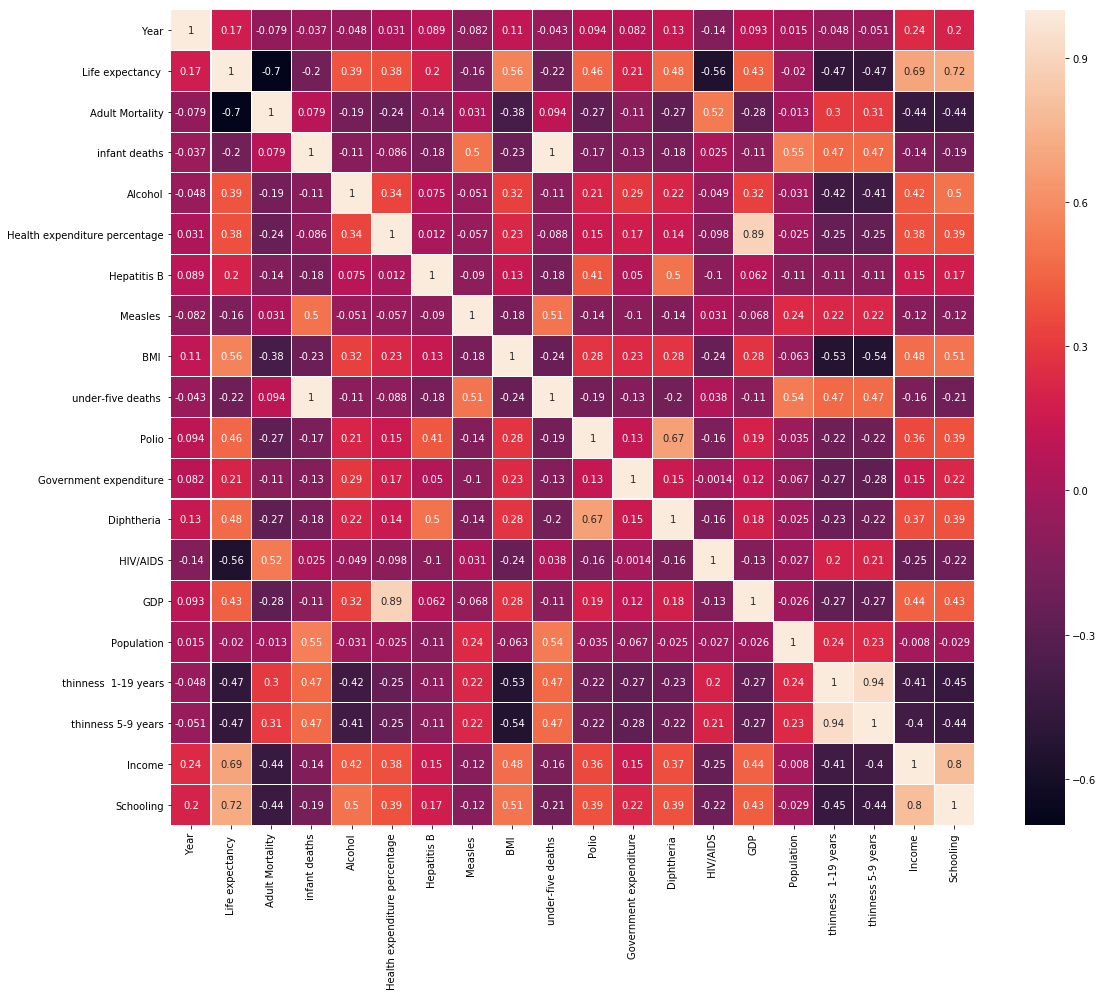

In [36]:
life_data_kor = life_data.corr()
plt.figure(figsize=(18,15))
sns.heatmap(life_data_kor,annot=True,linewidth=0.1)

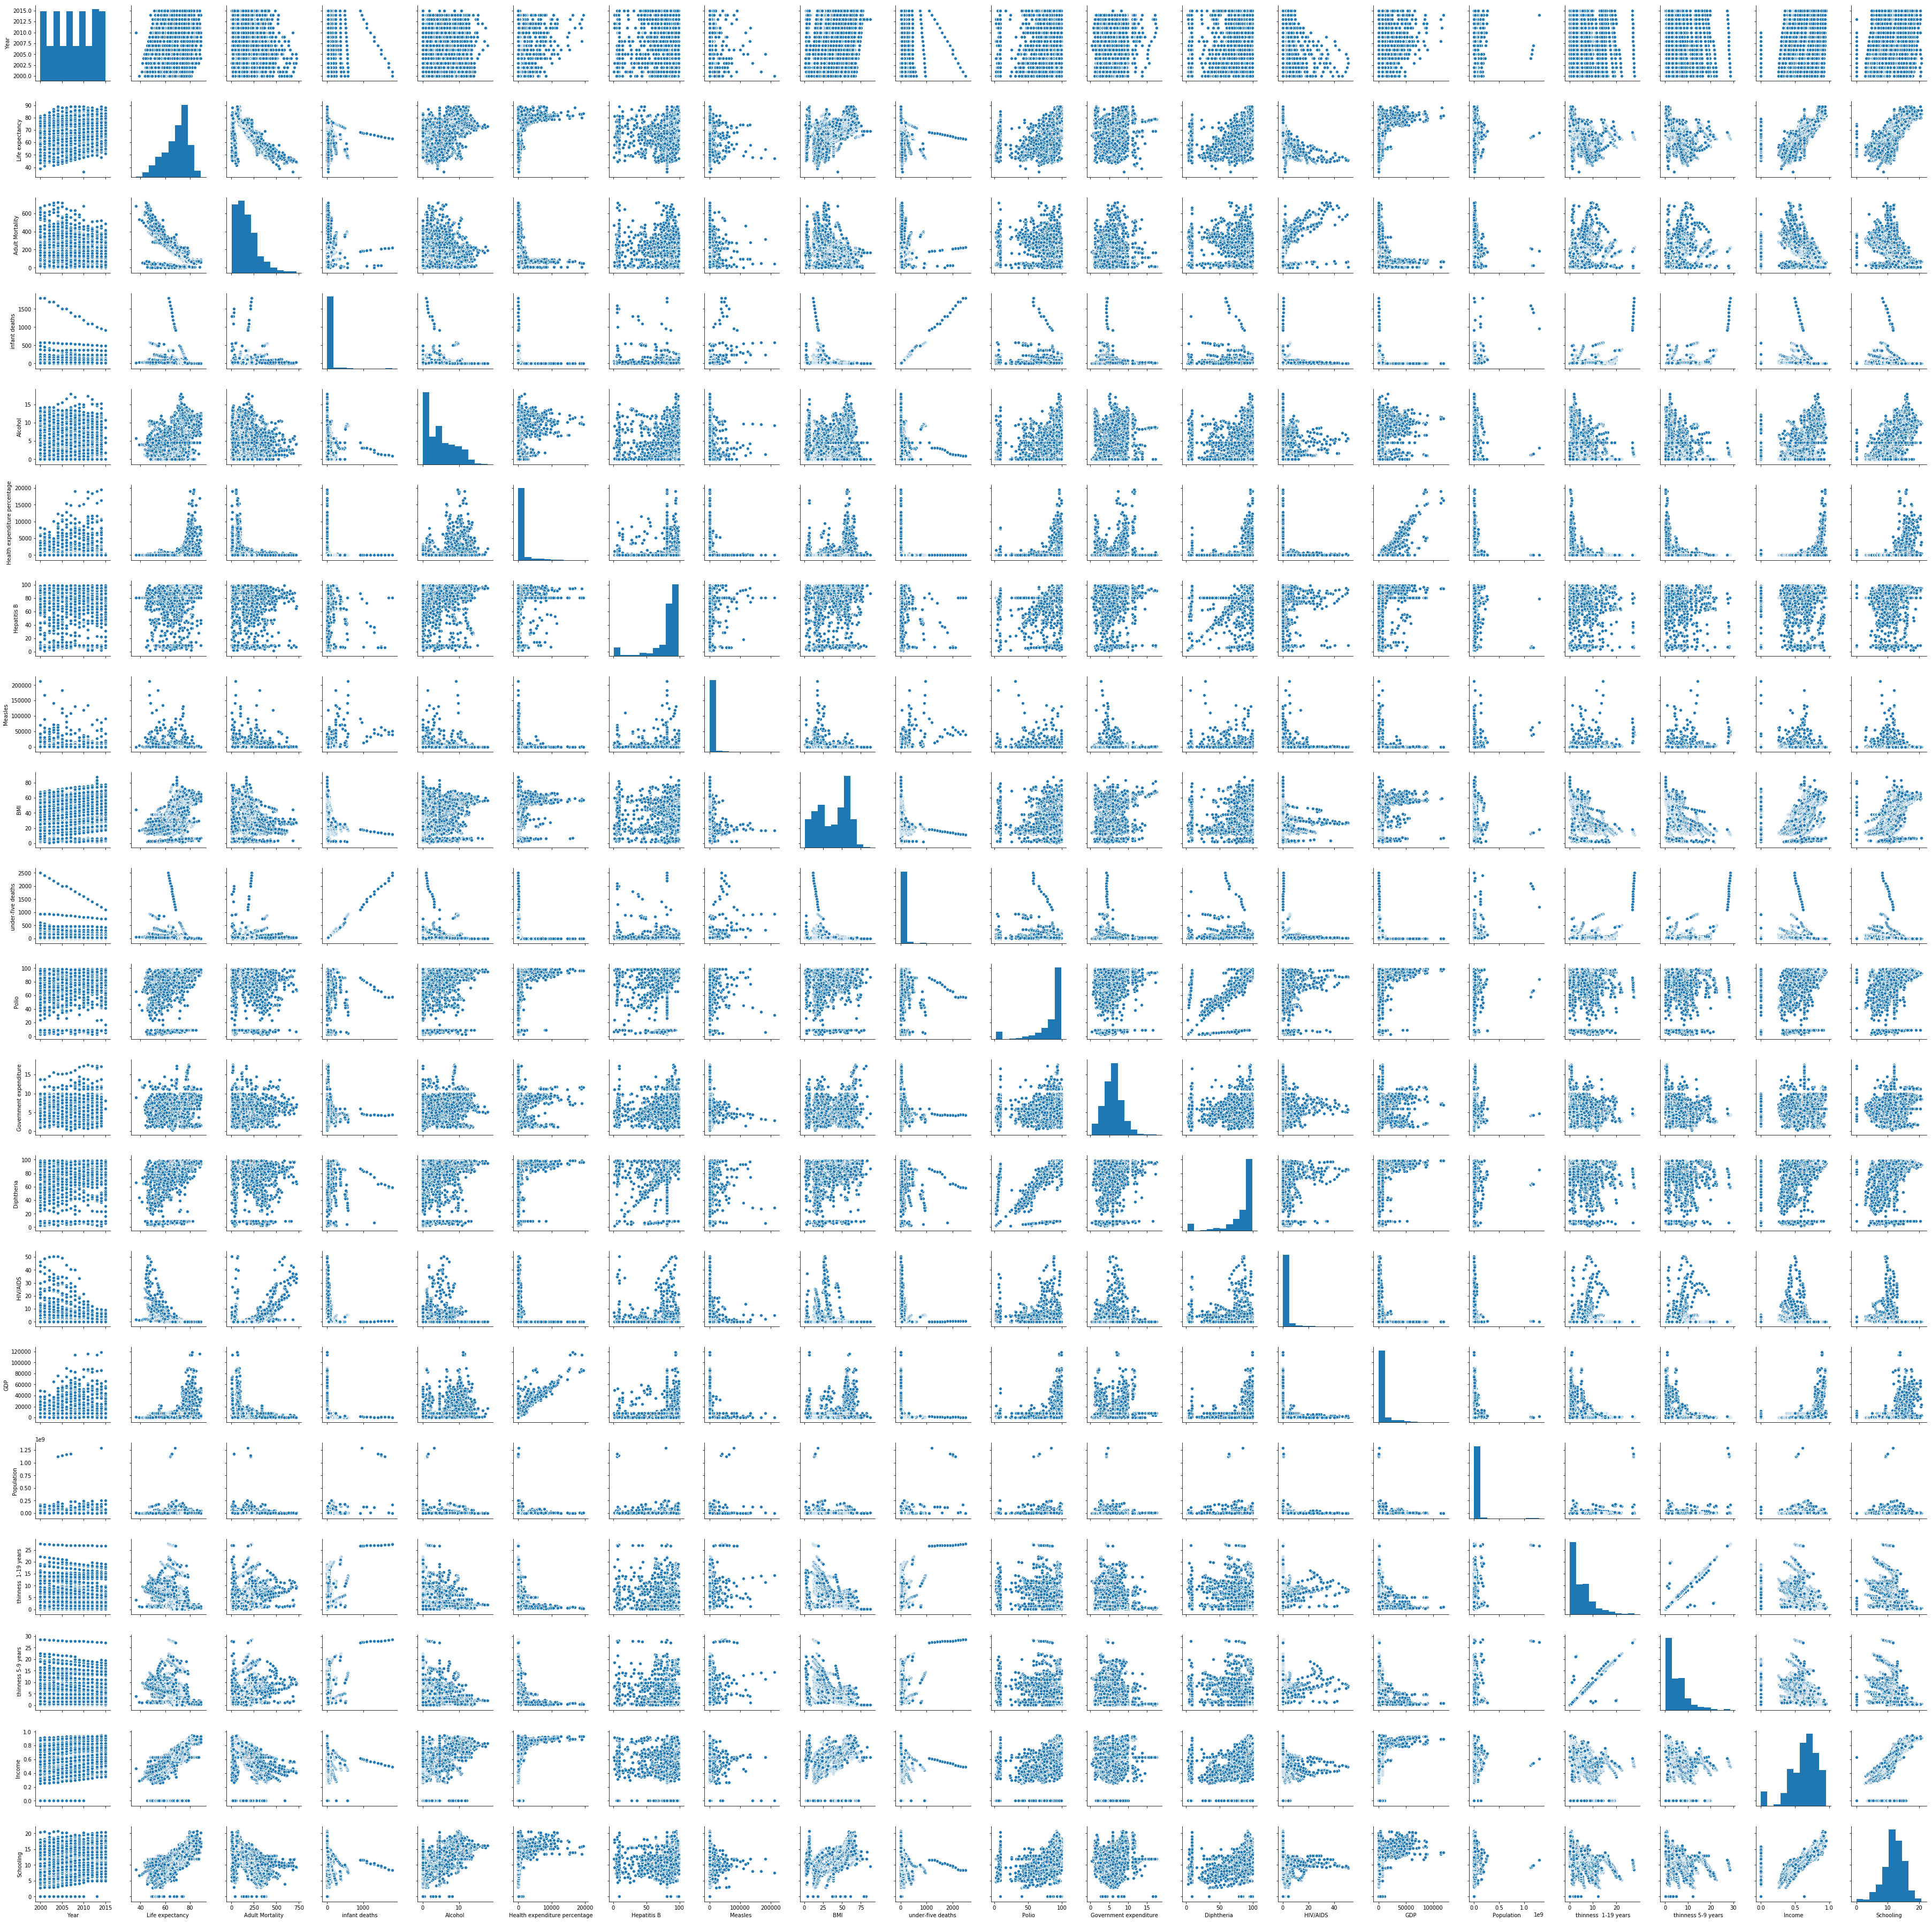

In [37]:
sns.pairplot(life_data)

In [38]:
round(life_data[['Status','Life expectancy ']].groupby(['Status']).mean(),2)

Life expectancy 
Status                      
Developed           79.20000
Developing          67.12000

In [39]:
life_labels = life_data['Life expectancy ']
life_features = life_data[life_data.columns.difference(['Life expectancy '])]

In [40]:
life_data.select_dtypes(include=['int64','float64']).columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'Health expenditure percentage', 'Hepatitis B', 'Measles ',
       ' BMI ', 'under-five deaths ', 'Polio', 'Government expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years', 'Income', 'Schooling'],
      dtype='object')

In [41]:
life_data.select_dtypes(include=['object','bool']).columns

Index(['Country', 'Status'], dtype='object')

In [42]:
categorical_features = ['Country','Status']
categorical_feature_mask = life_features.dtypes == object
categorical_features = life_features.columns[categorical_feature_mask].tolist()
categorical_transformer = Pipeline(steps = [('onehot',OneHotEncoder(handle_unknown='ignore')),])

In [43]:
numeric_features = ['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'Health expenditure percentage', 'Hepatitis B', 'Measles ',
       'BMI', 'under-five deaths ', 'Polio', 'Government expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       'Thinness 10-19 years', 'Thinness 5-9 years', 'Income', 'Schooling']
numeric_feature_mask = life_features.dtypes == object
numeric_features = life_features.columns[numeric_feature_mask].tolist()
numeric_transformer = Pipeline(steps = [('imputer',SimpleImputer(strategy='median')),
                                       ('scaler',StandardScaler())])

In [44]:
preprocessor = ColumnTransformer(
               transformers = [
                   ('num',numeric_transformer,numeric_features),
                   ('cat',categorical_transformer,categorical_features)
               ]
)

In [45]:
ExtraTreesRegressor = Pipeline([
    ('preprocessor',preprocessor),
    ('ExtraTreesRegressor',ExtraTreesRegressor(n_estimators=100,random_state=0))    
])

In [46]:
life_data.dtypes

Country                           object
Year                               int64
Status                            object
Life expectancy                  float64
Adult Mortality                  float64
infant deaths                      int64
Alcohol                          float64
Health expenditure percentage    float64
Hepatitis B                      float64
Measles                            int64
 BMI                             float64
under-five deaths                  int64
Polio                            float64
Government expenditure           float64
Diphtheria                       float64
 HIV/AIDS                        float64
GDP                              float64
Population                       float64
 thinness  1-19 years            float64
 thinness 5-9 years              float64
Income                           float64
Schooling                        float64
dtype: object

## Data Preprocessing

1) We drop the column Year and group the rows by Country by taking a mean of all values in different years.

2) We convert the Country, Status column into codes (ordered categorical type) by using astype.

## Missing Data

1) isnull is used to find missing data and mean value (columnwise) is considered as means to fill the missing values using fillna method.

In [47]:
life_data.isna().sum()

Country                          0
Year                             0
Status                           0
Life expectancy                  0
Adult Mortality                  0
infant deaths                    0
Alcohol                          0
Health expenditure percentage    0
Hepatitis B                      0
Measles                          0
 BMI                             0
under-five deaths                0
Polio                            0
Government expenditure           0
Diphtheria                       0
 HIV/AIDS                        0
GDP                              0
Population                       0
 thinness  1-19 years            0
 thinness 5-9 years              0
Income                           0
Schooling                        0
dtype: int64

In [48]:
life_data['Status'] = life_data['Status'].astype('category')
life_data['Status'] = life_data['Status'].cat.codes

In [49]:
life_data = life_data.groupby('Country').mean()

In [50]:
life_data.columns
life_data.dtypes

Year                             float64
Status                              int8
Life expectancy                  float64
Adult Mortality                  float64
infant deaths                    float64
Alcohol                          float64
Health expenditure percentage    float64
Hepatitis B                      float64
Measles                          float64
 BMI                             float64
under-five deaths                float64
Polio                            float64
Government expenditure           float64
Diphtheria                       float64
 HIV/AIDS                        float64
GDP                              float64
Population                       float64
 thinness  1-19 years            float64
 thinness 5-9 years              float64
Income                           float64
Schooling                        float64
dtype: object

In [51]:
life_labels = life_data['Life expectancy ']
life_features = life_data.drop('Life expectancy ',axis = 1)

In [52]:
life_features.isnull().sum()

Year                             0
Status                           0
Adult Mortality                  0
infant deaths                    0
Alcohol                          0
Health expenditure percentage    0
Hepatitis B                      0
Measles                          0
 BMI                             0
under-five deaths                0
Polio                            0
Government expenditure           0
Diphtheria                       0
 HIV/AIDS                        0
GDP                              0
Population                       0
 thinness  1-19 years            0
 thinness 5-9 years              0
Income                           0
Schooling                        0
dtype: int64

In [53]:
life_features.fillna(value = life_features.mean(),inplace = True)

In [54]:
life_features.fillna(value = life_labels.mean(),inplace = True)

In [55]:
life_features.head()

Year  Status  Adult Mortality  infant deaths  \
Country                                                                  
Afghanistan         2007.50000       1        269.06250       78.25000   
Albania             2007.50000       1         45.06250        0.68750   
Algeria             2007.50000       1        108.18750       20.31250   
Angola              2007.50000       1        328.56250       83.75000   
Antigua and Barbuda 2007.50000       1        127.50000        0.00000   

                     Alcohol  Health expenditure percentage  Hepatitis B  \
Country                                                                    
Afghanistan          0.01438                       34.96011     64.56250   
Albania              4.84875                      193.25909     98.00000   
Algeria              0.66893                      236.18524     78.73512   
Angola               5.66955                      102.10027     74.91145   
Antigua and Barbuda  7.74018                     1001.58523     97.18378   

                      Measles      BMI   under-five deaths     Polio  \
Country                                                                
Afghanistan         2362.25000 15.51875           107.56250 48.37500   
Albania               53.37500 49.06875             0.93750 98.12500   
Algeria             1943.87500 48.74375            23.50000 91.75000   
Angola              3561.31250 18.01875           132.62500 46.12500   
Antigua and Barbuda    0.00000 38.42500             0.00000 96.93750   

                     Government expenditure  Diphtheria    HIV/AIDS  \
Country                                                               
Afghanistan                         8.25250     52.31250    0.10000   
Albania                             5.94562     98.06250    0.10000   
Algeria                             4.68739     91.87500    0.10000   
Angola                              4.04551     47.68750    2.36875   
Antigua and Barbuda                 4.86301     98.31250    0.12500   

                           GDP     Population   thinness  1-19 years  \
Country                                                                
Afghanistan          340.01543  9972259.81250               16.58125   
Albania             2119.72668   696911.62500                1.61875   
Algeria             2847.85339 21649827.43750                6.09375   
Angola              1975.14305 10147099.18750                6.19375   
Antigua and Barbuda 9759.30573 12753375.12005                3.42500   

                      thinness 5-9 years  Income  Schooling  
Country                                                      
Afghanistan                     15.58125 0.41537    8.21250  
Albania                          1.70000 0.70988   12.13750  
Algeria                          5.97500 0.69487   12.71250  
Angola                           6.66875 0.45837    8.04375  
Antigua and Barbuda              3.37500 0.48862    8.84375

## EDA

1) We notice Positive Correlation of GDP, Percentage, Expenditure with Life Expectancy.

2) We notice no correlation of alcohol on life expectancy.

3) We notice negative correlation of HIV/AIDS, adult mortality with Life Expectancy. 

Text(0, 0.5, 'Life expectancy')

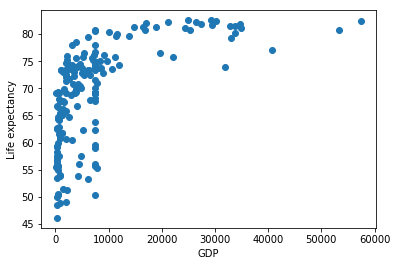

In [56]:
plt.scatter(life_data.GDP, life_data['Life expectancy '])
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

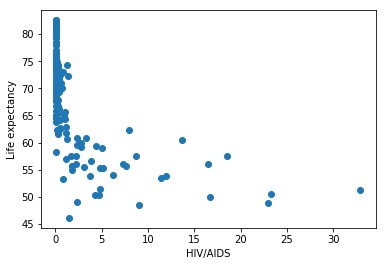

In [57]:
plt.scatter(life_data[' HIV/AIDS'], life_data['Life expectancy '])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

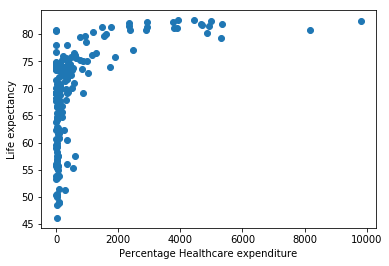

In [63]:
plt.scatter(life_data['Health expenditure percentage'], life_data['Life expectancy '])
plt.xlabel('Percentage Healthcare expenditure')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

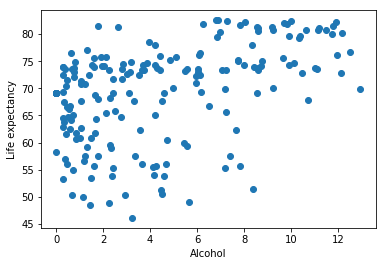

In [64]:
plt.scatter(life_data['Alcohol'], life_data['Life expectancy '])
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

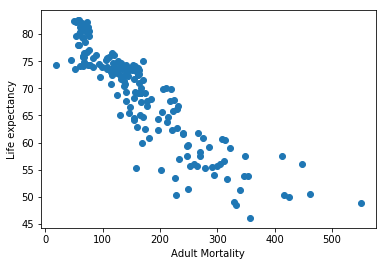

In [65]:
plt.scatter(life_data['Adult Mortality'], life_data['Life expectancy '])
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')

In [66]:
life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split(life_features, life_labels, train_size = 0.8, test_size = 0.2)

In [67]:
reg = LinearRegression(fit_intercept=True, normalize=True).fit(life_features_train, life_labels_train)

In [71]:
test_pred=reg.predict(life_features_test)
len(test_pred)

39

In [72]:
test_pred=reg.predict(life_features_test)
print(test_pred)

[72.44266783 67.56626246 57.30688248 79.22905655 76.47398285 77.25679848
 69.88048931 67.8000871  63.42817087 66.26720805 76.61516401 68.0218584
 69.90680184 55.04579209 69.01237644 74.32996143 78.49174522 80.04408667
 73.24801988 71.82890819 73.35570242 71.3721213  78.58285354 68.66140943
 61.18777816 60.98553962 70.99700505 70.7964561  55.63276305 71.96415266
 73.63304127 73.88099049 68.05949962 63.86165613 69.64453986 81.03636489
 51.11642081 61.34122416 72.57786214]


In [73]:
scoring = make_scorer(r2_score)

In [74]:
grid_cv = GridSearchCV(Ridge(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10,100,1000]},
              scoring=scoring, cv=5, refit=True)

In [75]:
grid_cv.fit(life_features_train, life_labels_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': range(0, 10), 'max_iter': [10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(r2_score), verbose=0)

In [76]:
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" %grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f" % r2_score(life_labels_test,grid_cv.best_estimator_.predict(life_features_test)))

Best Parameters: {'alpha': 1, 'max_iter': 10}
R^2 score on training data: 0.93
R^2 score: 0.91


In [77]:
!pip install watson-machine-learning-client

In [86]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [79]:
wml_credentials={
  "apikey": "55WRo4fdLJBhgmS2YWDAX_VnzIpd3CXRwIQbxMwiF28C",
  "instance_id": "53b8deba-90ed-4390-af2b-8b8002442657",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [80]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [81]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Shubham",
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "shubhambit92@gmail.com",
               client.repository.ModelMetaNames.NAME: "Life_Expectancy"}

In [82]:
model_artifact = client.repository.store_model(ExtraTreesRegressor, meta_props=model_props)

In [83]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [84]:
deployment = client.deployments.create(published_model_uid,name="LifeExpectancy")



#######################################################################################

Synchronous deployment creation for uid: '69393c57-0516-4ce1-800d-562cebd6cd3c' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='6c15021b-abeb-484a-a3f3-140809055c2e'
------------------------------------------------------------------------------------------------




In [85]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)
print(scoring_endpoint)

https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/53b8deba-90ed-4390-af2b-8b8002442657/deployments/6c15021b-abeb-484a-a3f3-140809055c2e/online
